In [9]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import argparse
import yaml
import matplotlib.pyplot as plt
import tifffile
import seaborn as sns
import bokeh

from utils import *
bokeh.io.output_notebook()

Loading BokehJS ...

In [10]:
# General info dataframe
filepath_measurements_info = "/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/sd_tweezers_info_1.csv"
results_dir = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/'

df_general_info = pd.read_csv(filepath_measurements_info, delimiter=';', encoding='utf-8')
df_general_info = df_general_info.sort_values(by='trackmate_file')
df_general_info.head()

,trackmate_file,MTs,first_pulse (frame),last_pulse_start (frame),t_on (frame),t_off (frame),tip_x,tip_y,calibration (mV),bead_type,time_interval (s),comments
0,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,131,251,10,30,98,378,1000,2.8 um myc dyna passivated PEG,0.5,NaN
1,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,169,249,10,30,98,378,1000,2.8 um myc dyna passivated PEG,0.5,NaN
2,/Volumes/cytokinesis-zebrafish-collab/magnetic...,y,13,653,10,30,53,314,1000,2.8 um myc dyna passivated PEG,0.5,NaN
3,/Volumes/cytokinesis-zebrafish-collab/magnetic...,n,11,611,10,30,57,360,1000,2.8 um myc dyna passivated PEG,0.5,"one bead stuck during pulses 7,8,9,10"
4,/Volumes/cytokinesis-zebrafish-collab/magnetic...,y,11,531,10,30,82,254,1000,2.8 um myc dyna passivated PEG,0.5,NaN


In [11]:
def get_fit_jeff_full(xfit, xdata, ydata, F_0, t_1, sigma=None) -> np.ndarray:
    est_eta_2 = F_0 * t_1 / (np.max(ydata)-np.mean(ydata)) 

    # print('estimate of eta2: ', est_eta_2)
    jeff_full_for_fit = lambda t, k, eta_1, eta_2: jeff_full(t, k, eta_1, eta_2, F_0, t_1)
    
    try:
        popt, pcov = curve_fit(jeff_full_for_fit, xdata, ydata, p0=[10, 10, 100], bounds=([0, 0, 0], [1000, 1000, 10000]), sigma=sigma)

        yfit = jeff_full_for_fit(xfit, *popt)

        return yfit, popt, pcov
    
    except:
        return False, False, False
     

20240523_s01p01t01_1_5sON_15sOFF_spots


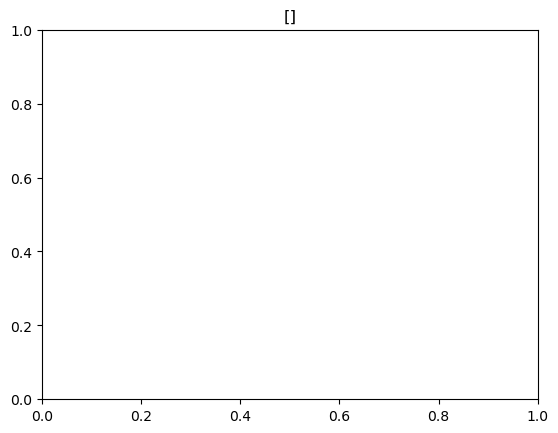

20240523_s01p01t021_1_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


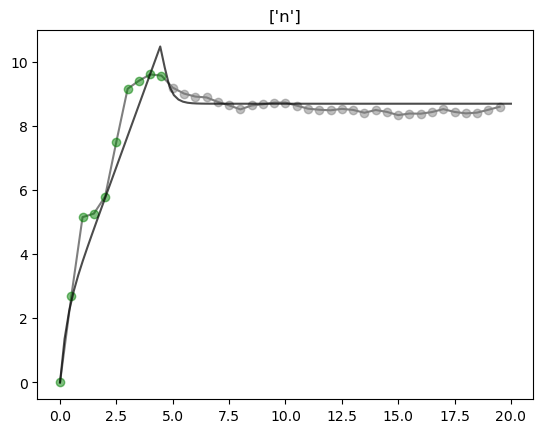

20240523_s02p01t01_1_5sON_15sOFF_spots


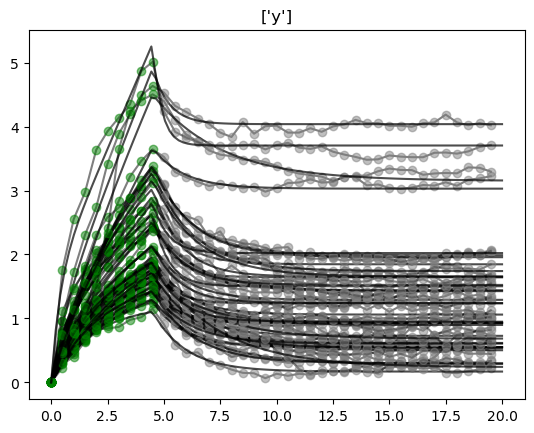

20240523_s02p01t02_1_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


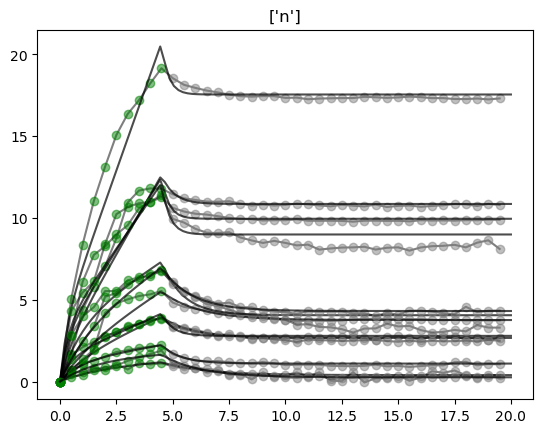

20240614_s02p02t01_2_5sON_15sOFF_spots


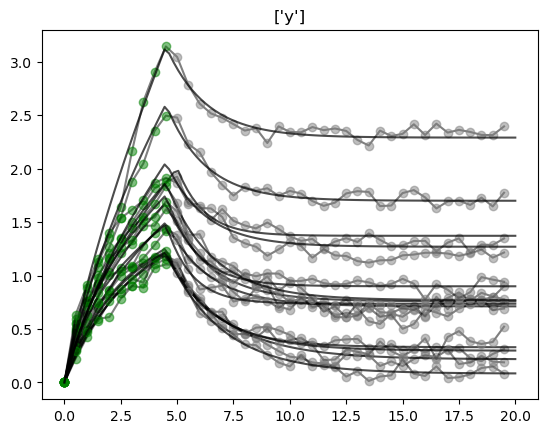

20240618_s01p02t01_2_5sON_15sOFF_spots


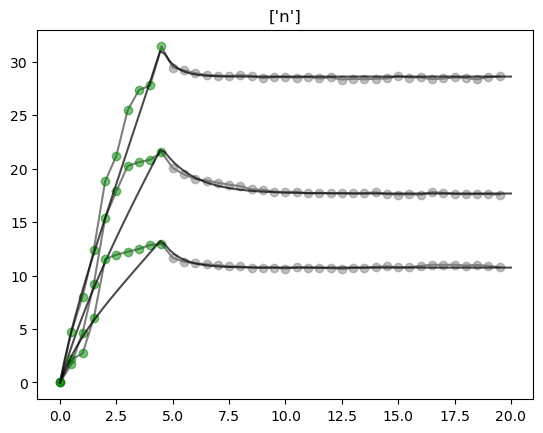

20240621_s01p01t01_2_5sON_15sOFF_spots


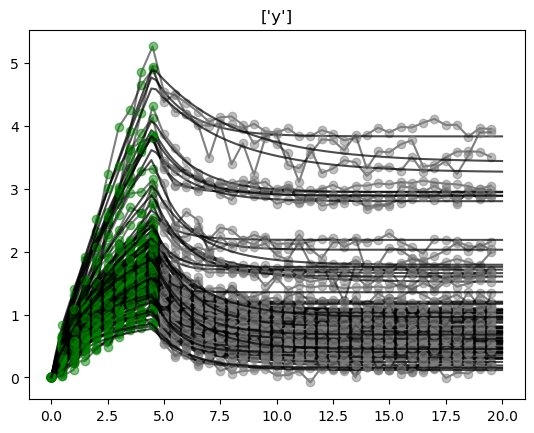

20240621_s01p01t02_2_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


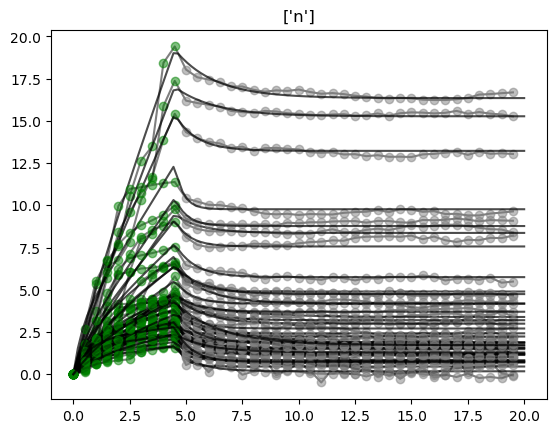

20240621_s01p01t03_2_5sON_15sOFF_spots


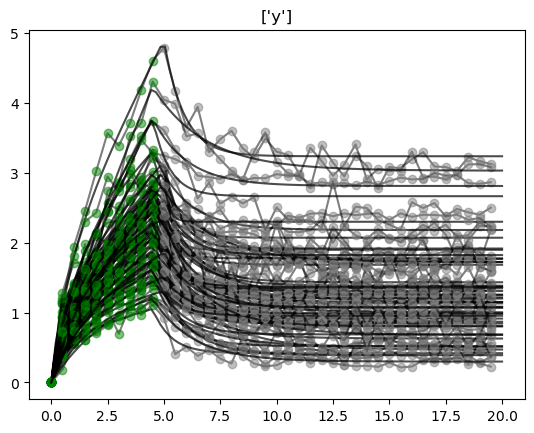

20240621_s02p01t01_2_5sON_15sOFF_spots


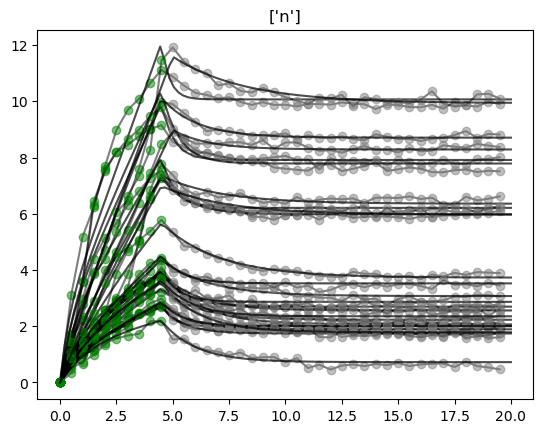

20240621_s02p02t01_2_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


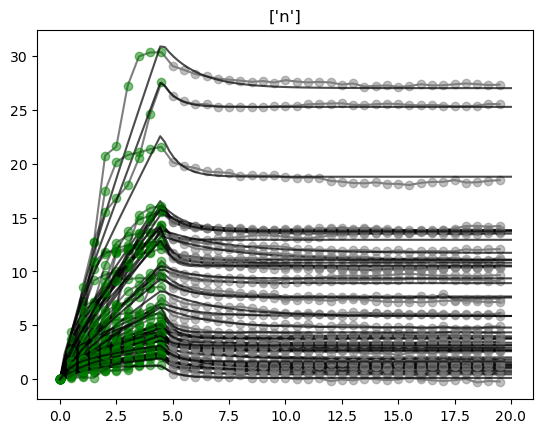

20240621_s02p02t02_2_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


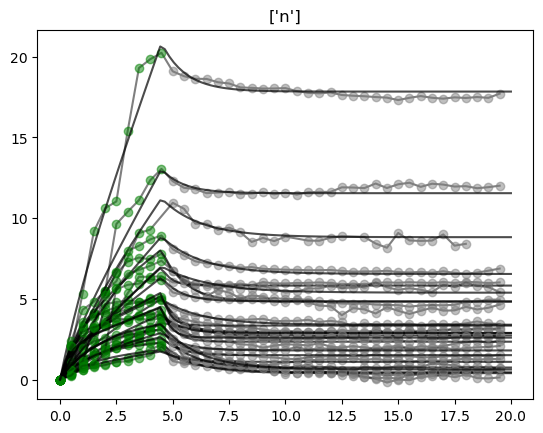

20240621_s02p02t03_2_5sON_15sOFF_1-131_spots


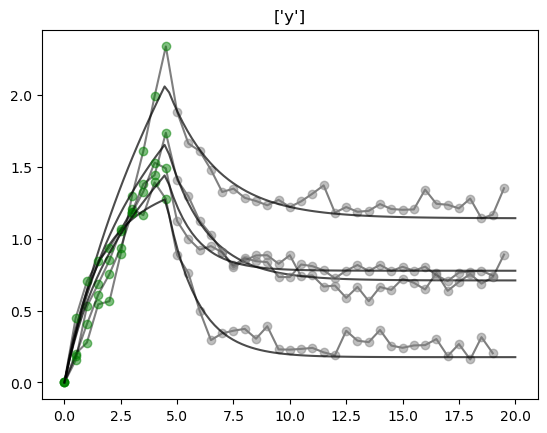

20240621_s02p02t03_2_5sON_15sOFF_125-600_spots


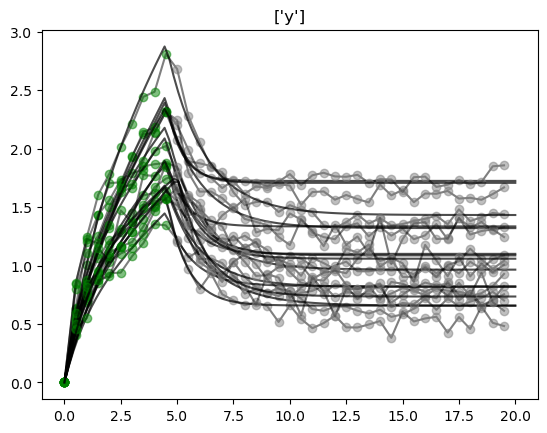

20240703_s02p01t02_2_5sON_15sOFF_spots


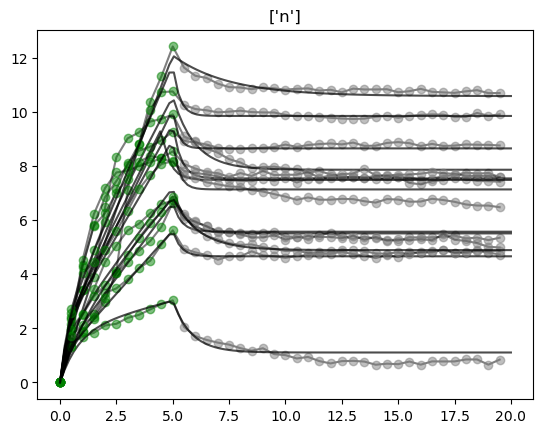

20240703_s03p01t01_2_5sON_15sOFF_spots_MT


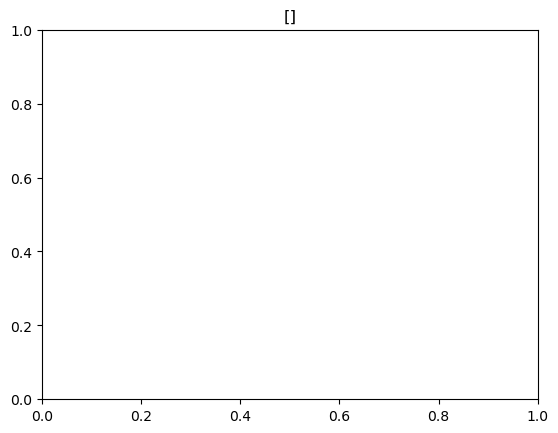

20240703_s03p01t01_2_5sON_15sOFF_spots_no_mt


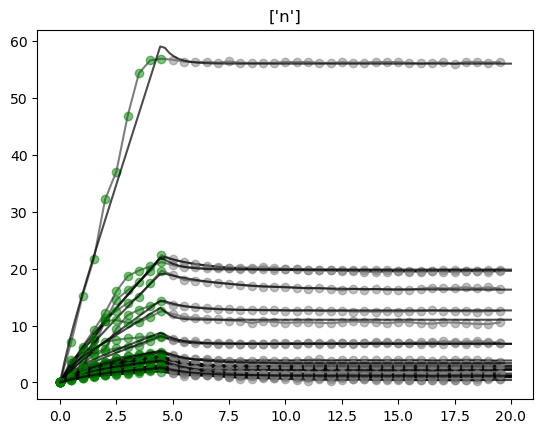

20240703_s03p01t02_2_5sON_15sOFF_spots


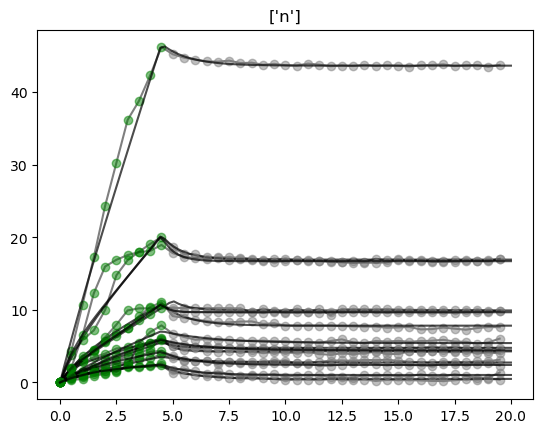

20240705_s01p01t01_2_5sON_15sOFF_spots


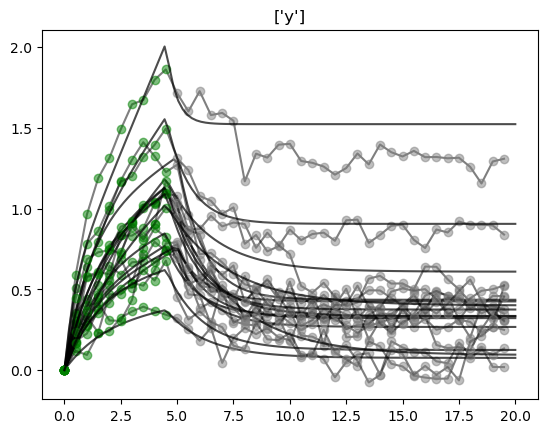

20240705_s02p01t01_2_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


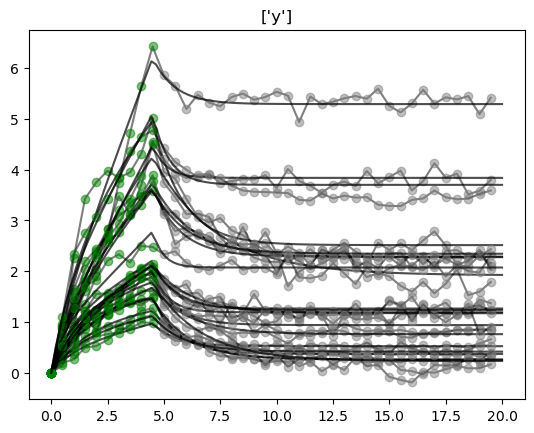

20240705_s02p01t03_2_5sON_15sOFF_spots


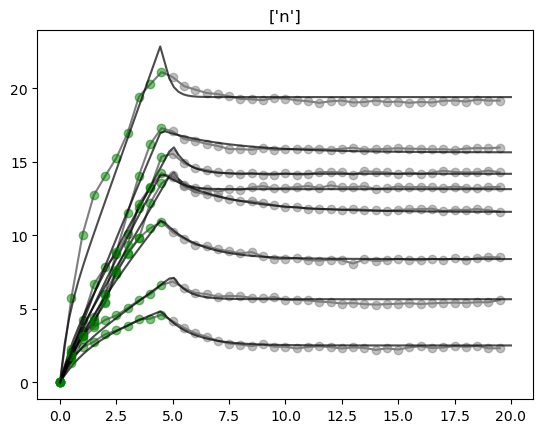

20240705_s03p01t01_2_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


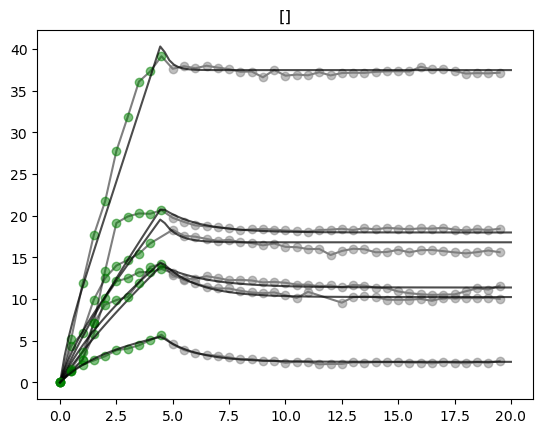

20240705_s03p01t02_2_5sON_15sOFF_spots


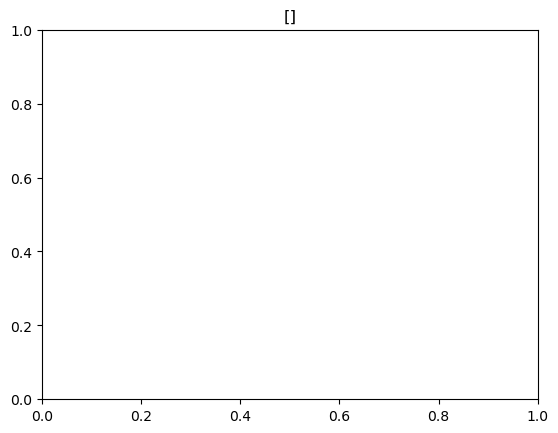

20240711_s01p01t03_2_5sON_15sOFF_spots


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


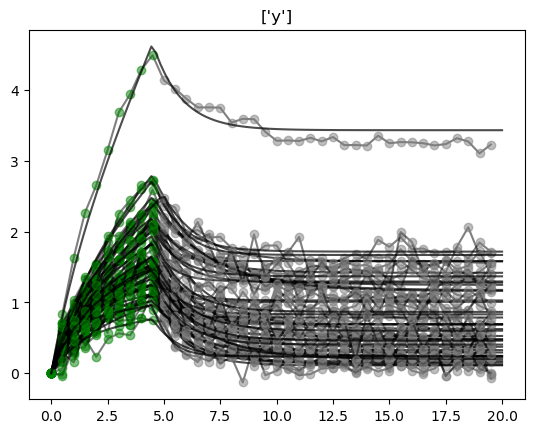

In [12]:
folder = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/measurements_extended_info/'

df_results_jeff = pd.DataFrame(columns=['EMBRYO', 'TRACK_ID', 'PULSE_NUMBER', 'MT_STATUS', 'k', 'eta_1', 'eta_2', 'a', 'k_err', 'eta_1_err', 'eta_2_err', 'a_err', 'R_SQUARED'])
df_results_jeff_filtered = pd.DataFrame(columns=['EMBRYO', 'TRACK_ID', 'PULSE_NUMBER', 'MT_STATUS', 'k', 'eta_1', 'eta_2', 'k_err', 'eta_1_err', 'eta_2_err','R_SQUARED'])

R2_min = 0.5 # cutoff for the weird fits

count_failed = 0
for idx in range(len(df_general_info)):
    filepath = df_general_info['trackmate_file'].values[idx]
    dt = df_general_info['time_interval (s)'].unique()[0]
    t_on = df_general_info['t_on (frame)'].unique()[0]
    t_off = df_general_info['t_off (frame)'].unique()[0]
    filename = os.path.basename(filepath).split('.')[0]
    print(filename)
    file_h5 = f'{filename}_extended.h5'
    comments = df_general_info['comments'].values[idx]

    df = pd.read_hdf(folder + file_h5, key='df')
    df = df.sort_values(by='POSITION_T')

    # plot curves
    
    for track_id in df['TRACK_ID'].unique():
        track = df[df['TRACK_ID']==track_id]
        track = track.dropna(subset=['CORRECTED DISPLACEMENT [um]'])
        for pulse_n in track['PULSE_NUMBER'].unique():
            pulse = track[track['PULSE_NUMBER']==pulse_n]
            time_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'FRAME'].values * dt
            time_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'FRAME'].values * dt
            time_off -= time_on[0]
            time_on -= time_on[0]
            time_data = list(time_on) + list(time_off)
            
            displacement_force_magnet_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'CORRECTED DISPLACEMENT [um]'].values
            displacement_force_magnet_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'].values
            displacement_force_data = list(displacement_force_magnet_on) + list(displacement_force_magnet_off)

            avg_force = np.average(pulse.loc[pulse['MAGNET_STATUS']==1, 'FORCE [pN]'].values)
            # print('avg force:')
            # print(avg_force)

            t_1 = (t_on - 1) * dt
            if displacement_force_data[(t_on)] > displacement_force_data[(t_on - 1)]:
                t_1 = t_on * dt

            sigma = np.ones_like(displacement_force_data)
            sigma[:4] = 0.3
            window = 8
            sigma[t_on - int(window//3):t_on + int(2*window//3)] = 0.2*np.ones(window//3 + int(2*window//3))

            time_fit = np.linspace(0, (t_on + t_off) * dt, 100)
            displacement_force_fit, popt, pcov = get_fit_jeff_full(time_fit, time_data, displacement_force_data, avg_force, t_1, sigma)
            if np.any(popt) == False:
                count_failed += 1
                continue
            params = ['k', 'eta_1', 'eta_2']
            text = ''
            for i in range(len(popt)):
                text += f"{params[i]}: {round(popt[i], 2)} +/- {round(np.sqrt(pcov[i][i]), 2)}\n"
                # print(f"{params[i]}: {popt[i]} +/- {np.sqrt(pcov[i][i])}")

            k, eta_1, eta_2 = popt
            k_err, eta_1_err, eta_2_err = [np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2])]
            # print(k, eta_1, eta_2)

            yfit = jeff_full(np.array(time_data), k, eta_1, eta_2, avg_force, t_1)
            R_sq = r_squared(np.array(displacement_force_data), np.array(yfit))
            # print('R squared: ', R_sq) 

            new_line = {'EMBRYO': [filename.split('_')[0]+filename.split('_')[1][0:6]], 
                        'TRACK_ID': track_id, 
                        'PULSE_NUMBER': pulse_n, 
                        'MT_STATUS': pulse['MT_STATUS'].unique(), 
                        'k': k, 
                        'eta_1': eta_1, 
                        'eta_2': eta_2, 
                        'k_err': k_err, 
                        'eta_1_err': eta_1_err, 
                        'eta_2_err': eta_2_err,
                        'R_SQUARED': R_sq}
            
            
            df_results_jeff = pd.concat([df_results_jeff, pd.DataFrame(new_line, index=[0])], ignore_index=True)

            filter_conditions = ((R_sq > R2_min) & (k_err/k < 0.5) & (eta_1_err/eta_1 < 0.5) & (eta_2_err/eta_2 < 0.5)) & (eta_2 < 2000) & (eta_1 > 2)

            if filter_conditions:
                # pass
                plt.plot(time_data, displacement_force_data, 'k-', alpha = 0.5, label=f'fit: {text}')
                plt.plot(time_on, displacement_force_magnet_on, 'o', color ='green', alpha=0.5, label = 'magnet ON')
                plt.plot(time_off, displacement_force_magnet_off, 'o', color='gray', alpha=0.5, label = 'magnet OFF')
                plt.plot(time_fit, displacement_force_fit, 'k-', label = 'fit', alpha = 0.7)
    
    title = track['MT_STATUS'].unique()
    plt.title(f'{title}')
    plt.show()




/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


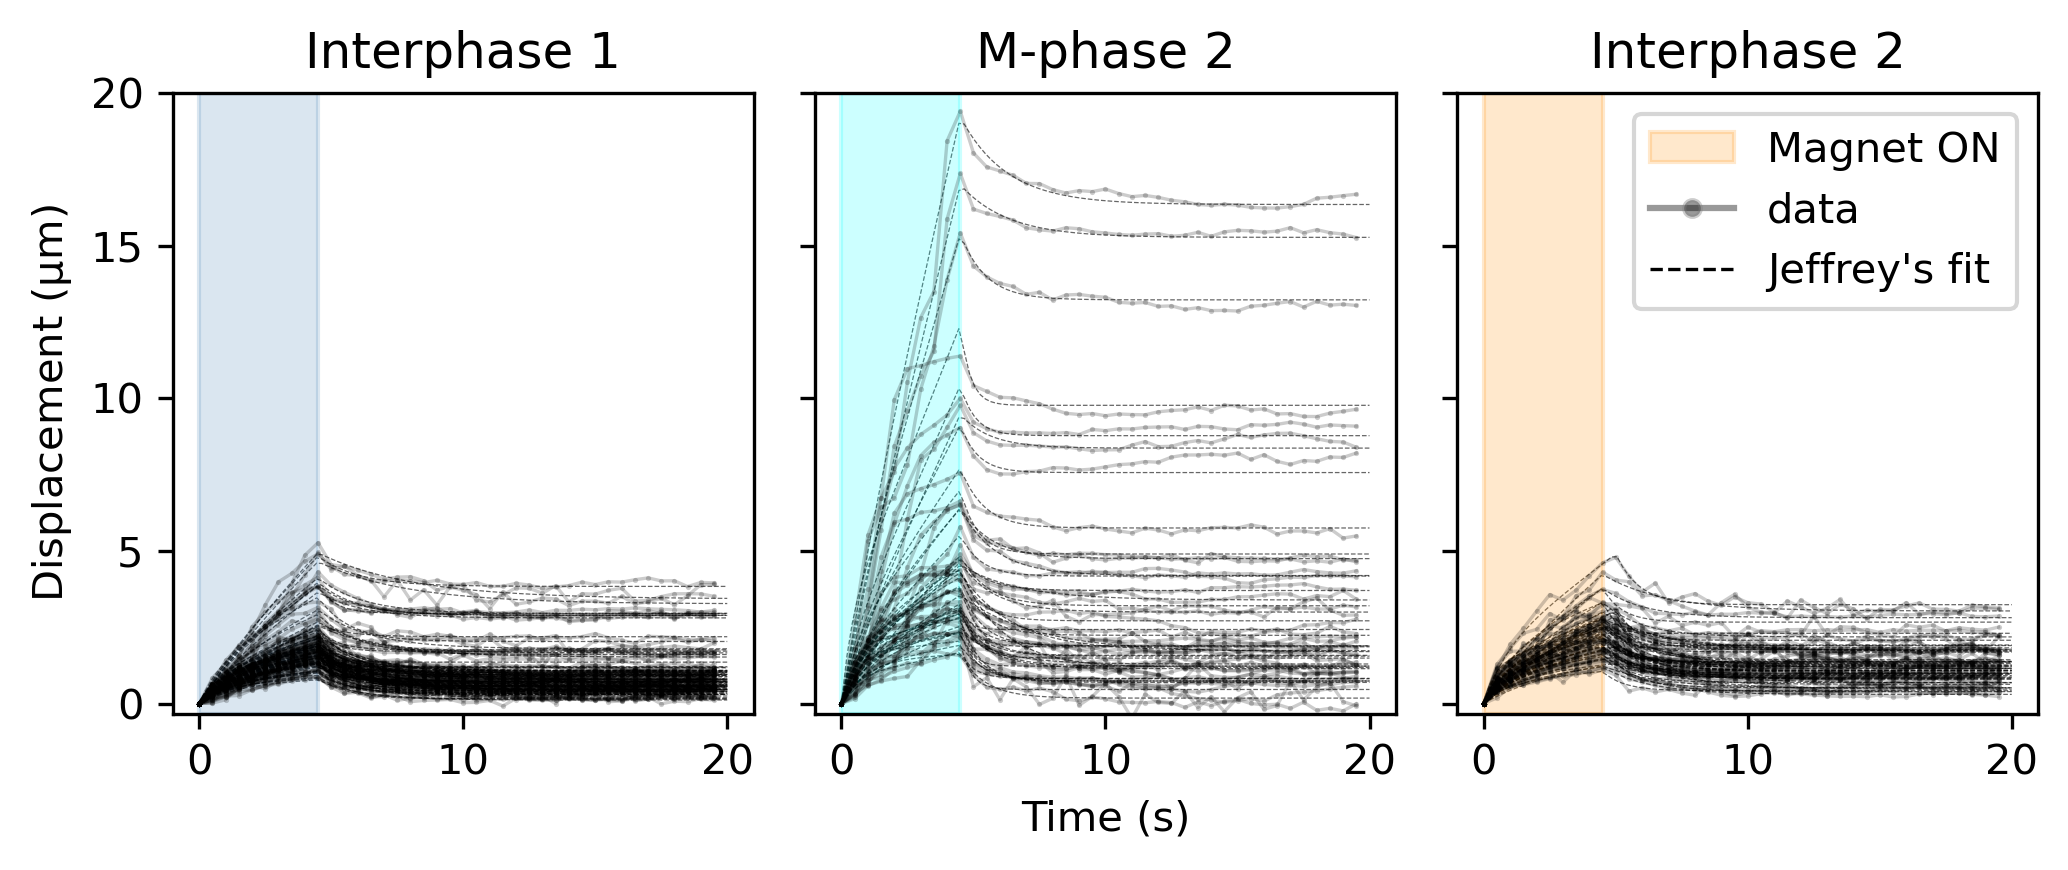

In [13]:
folder = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/measurements_extended_info/'

df_results_jeff = pd.DataFrame(columns=['EMBRYO', 'TRACK_ID', 'PULSE_NUMBER', 'MT_STATUS', 'k', 'eta_1', 'eta_2', 'a', 'k_err', 'eta_1_err', 'eta_2_err', 'a_err', 'R_SQUARED'])
df_results_jeff_filtered = pd.DataFrame(columns=['EMBRYO', 'TRACK_ID', 'PULSE_NUMBER', 'MT_STATUS', 'k', 'eta_1', 'eta_2', 'k_err', 'eta_1_err', 'eta_2_err','R_SQUARED'])

R2_min = 0.5 # cutoff for the weird fits


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(7, 3), dpi=300)

count_failed = 0
a = 0
for idx in range(len(df_general_info)):
    filepath = df_general_info['trackmate_file'].values[idx]
    dt = df_general_info['time_interval (s)'].unique()[0]
    t_on = df_general_info['t_on (frame)'].unique()[0]
    t_off = df_general_info['t_off (frame)'].unique()[0]
    filename = os.path.basename(filepath).split('.')[0]
    embryo = filename.split('_')[0]+filename.split('_')[1][0:6]
    if embryo != '20240621s01p01':
        continue

    file_h5 = f'{filename}_extended.h5'
    comments = df_general_info['comments'].values[idx]

    df = pd.read_hdf(folder + file_h5, key='df')
    df = df.sort_values(by='POSITION_T')

    colors = ['steelblue', 'cyan', 'darkorange']
    axs[a].axvspan(0, 4.5, color=colors[a], alpha=0.2, label='Magnet ON')
 
    # plot curves
    for track_id in df['TRACK_ID'].unique():
        track = df[df['TRACK_ID']==track_id]
        track = track.dropna(subset=['CORRECTED DISPLACEMENT [um]'])
        for pulse_n in track['PULSE_NUMBER'].unique():
            pulse = track[track['PULSE_NUMBER']==pulse_n]
            time_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'FRAME'].values * dt
            time_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'FRAME'].values * dt
            time_off -= time_on[0]
            time_on -= time_on[0]
            time_data = list(time_on) + list(time_off)
            
            displacement_force_magnet_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'CORRECTED DISPLACEMENT [um]'].values
            displacement_force_magnet_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'].values
            displacement_force_data = list(displacement_force_magnet_on) + list(displacement_force_magnet_off)

            avg_force = np.average(pulse.loc[pulse['MAGNET_STATUS']==1, 'FORCE [pN]'].values)

            t_1 = (t_on - 1) * dt
            if displacement_force_data[(t_on)] > displacement_force_data[(t_on - 1)]:
                t_1 = t_on * dt

            sigma = np.ones_like(displacement_force_data)
            sigma[:4] = 0.3
            window = 8
            sigma[t_on - int(window//3):t_on + int(2*window//3)] = 0.2*np.ones(window//3 + int(2*window//3))

            time_fit = np.linspace(0, (t_on + t_off) * dt, 100)
            displacement_force_fit, popt, pcov = get_fit_jeff_full(time_fit, time_data, displacement_force_data, avg_force, t_1, sigma)
            if np.any(popt) == False:
                count_failed += 1
                continue
            params = ['k', 'eta_1', 'eta_2']
            text = ''
            for i in range(len(popt)):
                text += f"{params[i]}: {round(popt[i], 2)} +/- {round(np.sqrt(pcov[i][i]), 2)}\n"
                # print(f"{params[i]}: {popt[i]} +/- {np.sqrt(pcov[i][i])}")

            k, eta_1, eta_2 = popt
            k_err, eta_1_err, eta_2_err = [np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2])]
            # print(k, eta_1, eta_2)

            yfit = jeff_full(np.array(time_data), k, eta_1, eta_2, avg_force, t_1)
            R_sq = r_squared(np.array(displacement_force_data), np.array(yfit))
            # print('R squared: ', R_sq) 

            new_line = {'EMBRYO': [filename.split('_')[0]+filename.split('_')[1][0:6]], 
                        'TRACK_ID': track_id, 
                        'PULSE_NUMBER': pulse_n, 
                        'MT_STATUS': pulse['MT_STATUS'].unique(), 
                        'k': k, 
                        'eta_1': eta_1, 
                        'eta_2': eta_2, 
                        'k_err': k_err, 
                        'eta_1_err': eta_1_err, 
                        'eta_2_err': eta_2_err,
                        'R_SQUARED': R_sq}
            
            
            df_results_jeff = pd.concat([df_results_jeff, pd.DataFrame(new_line, index=[0])], ignore_index=True)

            filter_conditions = ((R_sq > R2_min) & (k_err/k < 0.5) & (eta_1_err/eta_1 < 0.5) & (eta_2_err/eta_2 < 0.5)) & (eta_2 < 2000) & (eta_1 > 2)

            if filter_conditions:
                axs[a].plot(time_data, displacement_force_data, 'k-', linewidth=0.8, alpha = 0.2)
                # axs[a].plot(time_data, displacement_force_data, 'k.', markersize=2, alpha = 0.4)
                axs[a].plot(time_on, displacement_force_magnet_on, '.', markersize=2.5, color ='black', markeredgecolor='none', alpha=0.2)
                axs[a].plot(time_off, displacement_force_magnet_off, '.', markersize=2.5, color='black', markeredgecolor='none', alpha=0.2)
                axs[a].plot(time_fit, displacement_force_fit, color='black', linestyle='dashed', linewidth=0.3, alpha=0.6, zorder=-1)
                
    
    title = track['MT_STATUS'].unique()
    axs[a].set_ylim(top = 20)
    axs[1].set_xlabel('Time (s)')
    a += 1

axs[0].set_ylabel('Displacement ($\mathrm{\mu}$m)')
axs[0].set_title('Interphase 1')
axs[1].set_title('M-phase 2')
axs[2].set_title('Interphase 2')
axs[2].plot([], [], 'o-', markersize=4, color ='black', markeredgecolor='gray', alpha=0.4, label = 'data')
axs[2].plot([], [], color='black', linestyle='dashed', linewidth=0.8, label = 'Jeffrey\'s fit')
axs[2].legend()
plt.subplots_adjust(wspace=0)
plt.tight_layout()
plt.savefig(f'{results_dir}results/result_trajectories_{embryo}.png')
plt.savefig(f'{results_dir}results/result_trajectories_{embryo}.svg', format='svg')
plt.show()

70.48645575194715
72.12409627695531
72.91902442262344
74.58248926874217
75.53562239569092
76.26287874789385
77.54698632547475
78.93512693487243
73.56704817130102
75.53991006921152
78.3596653231497
81.84043071597017
82.36185594297822
84.06124337402412
71.79501637934271


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


70.35814265937861
81.5111484917094
103.79014244659274
95.84677388460725
76.75478353309677
101.98775358515408


/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))
/Users/ursic/PhD/Projects/1_DataAnalysis_zebrafish/beads_in_zebrafish/magnetic_tweezers_SD/utils.py:529: RuntimeWarning: overflow encountered in exp
  x_2 = (F_0 / k * (1 - np.exp(-k * t_1 / eta_1)) + F_0 * t_1 / eta_2) * (a * np.exp(-(t-t_1) * k / eta_1) + (1-a))


70.66874987979762
72.59055378534767
72.24377853585186
75.93093568508954
78.62320187042731
81.28323018348217
83.83908066556941
90.7021435470609
92.65668372995971
74.55844181543725
77.63695405631049
80.95287742297612
88.8549471089165
91.40837567474098


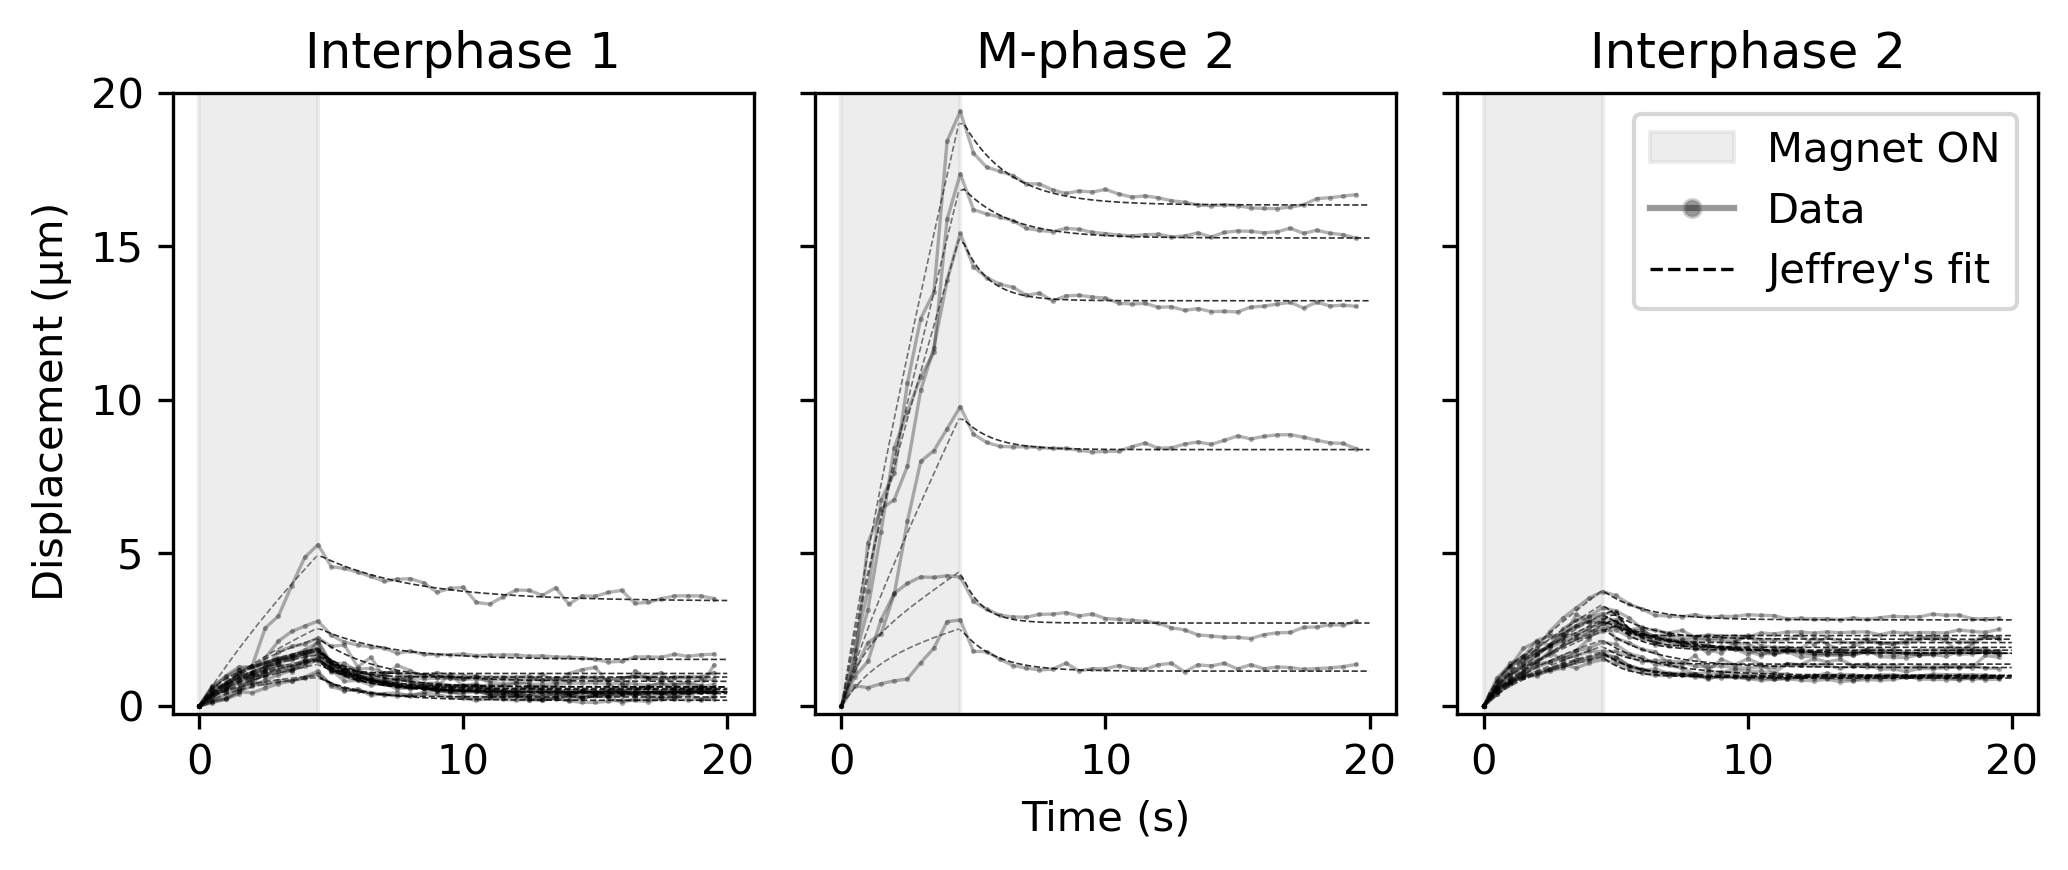

In [16]:
# only for specific force ranges
folder = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/measurements_extended_info/'

df_results_jeff = pd.DataFrame(columns=['EMBRYO', 'TRACK_ID', 'PULSE_NUMBER', 'MT_STATUS', 'k', 'eta_1', 'eta_2', 'a', 'k_err', 'eta_1_err', 'eta_2_err', 'a_err', 'R_SQUARED'])
df_results_jeff_filtered = pd.DataFrame(columns=['EMBRYO', 'TRACK_ID', 'PULSE_NUMBER', 'MT_STATUS', 'k', 'eta_1', 'eta_2', 'k_err', 'eta_1_err', 'eta_2_err','R_SQUARED'])

R2_min = 0.5 # cutoff for the weird fits


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(7, 3), dpi=300)

count_failed = 0
a = 0
for idx in range(len(df_general_info)):
    filepath = df_general_info['trackmate_file'].values[idx]
    dt = df_general_info['time_interval (s)'].unique()[0]
    t_on = df_general_info['t_on (frame)'].unique()[0]
    t_off = df_general_info['t_off (frame)'].unique()[0]
    filename = os.path.basename(filepath).split('.')[0]
    embryo = filename.split('_')[0]+filename.split('_')[1][0:6]
    if embryo != '20240621s01p01':
        continue

    file_h5 = f'{filename}_extended.h5'
    comments = df_general_info['comments'].values[idx]

    df = pd.read_hdf(folder + file_h5, key='df')
    df = df.sort_values(by='POSITION_T')

    axs[a].axvspan(0, 4.5, color='lightgrey', alpha=0.4, label='Magnet ON') 
    # plot curves
    for track_id in df['TRACK_ID'].unique():
        track = df[df['TRACK_ID']==track_id]
        track = track.dropna(subset=['CORRECTED DISPLACEMENT [um]'])
        for pulse_n in track['PULSE_NUMBER'].unique():
            pulse = track[track['PULSE_NUMBER']==pulse_n]
            time_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'FRAME'].values * dt
            time_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'FRAME'].values * dt
            time_off -= time_on[0]
            time_on -= time_on[0]
            time_data = list(time_on) + list(time_off)
            
            displacement_force_magnet_on = pulse.loc[pulse['MAGNET_STATUS']==1, 'CORRECTED DISPLACEMENT [um]'].values
            displacement_force_magnet_off = pulse.loc[pulse['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'].values
            displacement_force_data = list(displacement_force_magnet_on) + list(displacement_force_magnet_off)

            avg_force = np.average(pulse.loc[pulse['MAGNET_STATUS']==1, 'FORCE [pN]'].values)

            t_1 = (t_on - 1) * dt
            if displacement_force_data[(t_on)] > displacement_force_data[(t_on - 1)]:
                t_1 = t_on * dt

            sigma = np.ones_like(displacement_force_data)
            sigma[:4] = 0.3
            window = 8
            sigma[t_on - int(window//3):t_on + int(2*window//3)] = 0.2*np.ones(window//3 + int(2*window//3))

            time_fit = np.linspace(0, (t_on + t_off) * dt, 100)
            displacement_force_fit, popt, pcov = get_fit_jeff_full(time_fit, time_data, displacement_force_data, avg_force, t_1, sigma)
            if np.any(popt) == False:
                count_failed += 1
                continue
            params = ['k', 'eta_1', 'eta_2']
            text = ''
            for i in range(len(popt)):
                text += f"{params[i]}: {round(popt[i], 2)} +/- {round(np.sqrt(pcov[i][i]), 2)}\n"
                # print(f"{params[i]}: {popt[i]} +/- {np.sqrt(pcov[i][i])}")

            k, eta_1, eta_2 = popt
            k_err, eta_1_err, eta_2_err = [np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2])]
            # print(k, eta_1, eta_2)

            yfit = jeff_full(np.array(time_data), k, eta_1, eta_2, avg_force, t_1)
            R_sq = r_squared(np.array(displacement_force_data), np.array(yfit))
            # print('R squared: ', R_sq) 

            new_line = {'EMBRYO': [filename.split('_')[0]+filename.split('_')[1][0:6]], 
                        'TRACK_ID': track_id, 
                        'PULSE_NUMBER': pulse_n, 
                        'MT_STATUS': pulse['MT_STATUS'].unique(), 
                        'k': k, 
                        'eta_1': eta_1, 
                        'eta_2': eta_2, 
                        'k_err': k_err, 
                        'eta_1_err': eta_1_err, 
                        'eta_2_err': eta_2_err,
                        'R_SQUARED': R_sq}
            
            
            df_results_jeff = pd.concat([df_results_jeff, pd.DataFrame(new_line, index=[0])], ignore_index=True)

            # restricted force for representation!!!
            filter_conditions = ((R_sq > R2_min) & (k_err/k < 0.5) & (eta_1_err/eta_1 < 0.5) & (eta_2_err/eta_2 < 0.5)) & (eta_2 < 2000) & (eta_1 > 2) & (70 < avg_force < 110)
            

            if filter_conditions:
                print(avg_force)
                axs[a].plot(time_data, displacement_force_data, 'k-', linewidth=0.8, alpha = 0.3)
                # axs[a].plot(time_data, displacement_force_data, 'k.', markersize=2, alpha = 0.4)
                axs[a].plot(time_on, displacement_force_magnet_on, '.', markersize=2.5, color ='black', markeredgecolor='none', alpha=0.3)
                axs[a].plot(time_off, displacement_force_magnet_off, '.', markersize=2.5, color='black', markeredgecolor='none', alpha=0.3)
                axs[a].plot(time_fit, displacement_force_fit, color='black', linestyle='dashed', linewidth=0.4, alpha=0.8, zorder=-1)
                
    
    title = track['MT_STATUS'].unique()
    axs[a].set_ylim(top = 20)
    axs[1].set_xlabel('Time (s)')
    a += 1

axs[0].set_ylabel('Displacement ($\mathrm{\mu}$m)')
axs[0].set_title('Interphase 1')
axs[1].set_title('M-phase 2')
axs[2].set_title('Interphase 2')
axs[2].plot([], [], 'o-', markersize=4, color ='black', markeredgecolor='gray', alpha=0.4, label = 'Data')
axs[2].plot([], [], color='black', linestyle='dashed', linewidth=0.8, label = 'Jeffrey\'s fit')
axs[2].legend()
plt.subplots_adjust(wspace=0)
plt.tight_layout()
plt.savefig(f'{results_dir}results/result_trajectories_{embryo}.png')
plt.savefig(f'{results_dir}results/result_trajectories_{embryo}.svg', format='svg')
plt.show()

ValueError: Invalid RGBA argument: 'gay'

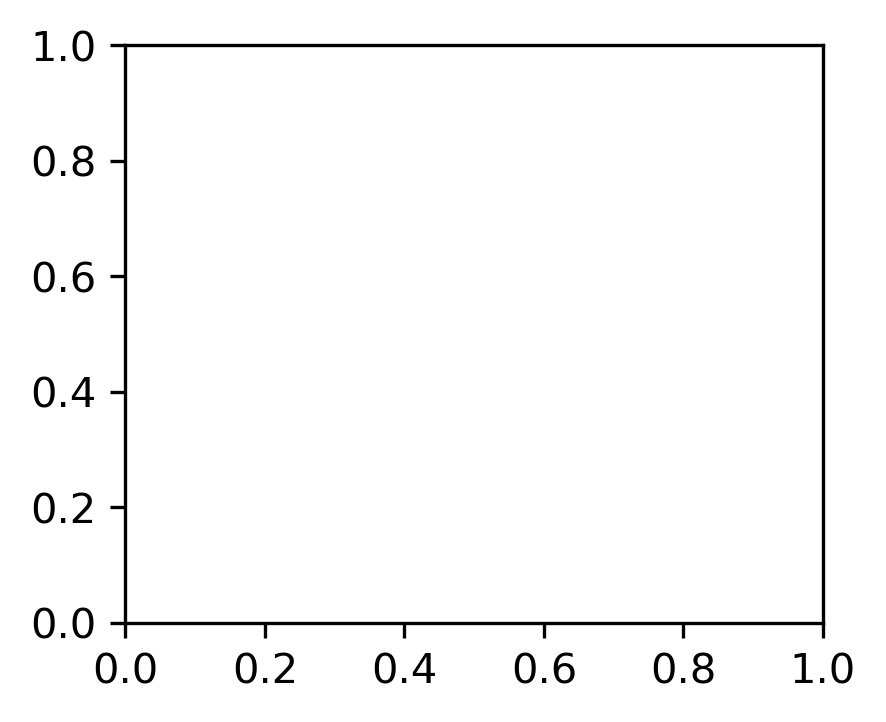

In [17]:
# schematic

fig = plt.figure(figsize=(3, 2.5), dpi=300)
time = np.linspace(0, 20, 500)
displacement = jeff_full(time, 20, 50, 100, 40, 4.5)

plt.axvspan(0, 4.5, color='gay', alpha=0.1, label='Magnet ON') 
plt.plot(time, displacement, 'k')
plt.xticks([])
plt.yticks([])
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.savefig(f'{results_dir}results/schematic.svg', format='svg')
plt.show()